In [11]:
using Jacobi
using PyPlot
include("../../HPFEM.jl/src/HPFEM.jl");

In [12]:
M= 19
Q=M
nel = 1
nnodes = nel + 1
a=-5
b= 5
idir = []#,nnodes]

lagr = HPFEM.Lagrange1d(M);
quad = HPFEM.QuadType(Q);
base = HPFEM.Basis1d(lagr, quad);
nodes = collect(linspace(a, b, nnodes));
lmap = HPFEM.locmap(base)
dof = HPFEM.DofMap1d(lmap, nnodes, idir);


In [13]:

elemento = [HPFEM.Element1d(e, nodes[e], nodes[e+1], base) for e = 1:nel]
solver = HPFEM.CholeskySC(dof, HPFEM.BBSymTri);



In [14]:
for e = 1:nel
    Ae = HPFEM.mass_matrix(base, elemento[e])
    HPFEM.add_local_matrix(solver, e, Ae)
end

In [15]:
fun(x) = sin(2*pi*x)
fun(x) = 1./(1 + x.^2)
x = linspace(a,b,101)
#plot(x,fun(x));

In [16]:
Fe = zeros(HPFEM.nmodes(lmap), nel)

for e = 1:nel
    fe = fun(elemento[e].x)
    HPFEM.add_rhs!(base, elemento[e], fe, sub(Fe, :, e))
end


In [17]:
HPFEM.solve!(solver, Fe)


19x1 Array{Float64,2}:
 0.0384615
 0.040093 
 0.0443038
 0.0521724
 0.0661437
 0.0918431
 0.143695 
 0.264506 
 0.582887 
 1.0      
 0.582887 
 0.264506 
 0.143695 
 0.0918431
 0.0661437
 0.0521724
 0.0443038
 0.040093 
 0.0384615

In [18]:
nξ = 101
ξ = collect(linspace(-1,1,nξ));
ϕ = zeros(nξ, M)
for i = 1:M
    ϕ[:,i] = base(ξ, i)
end

Ue = ϕ * Fe;


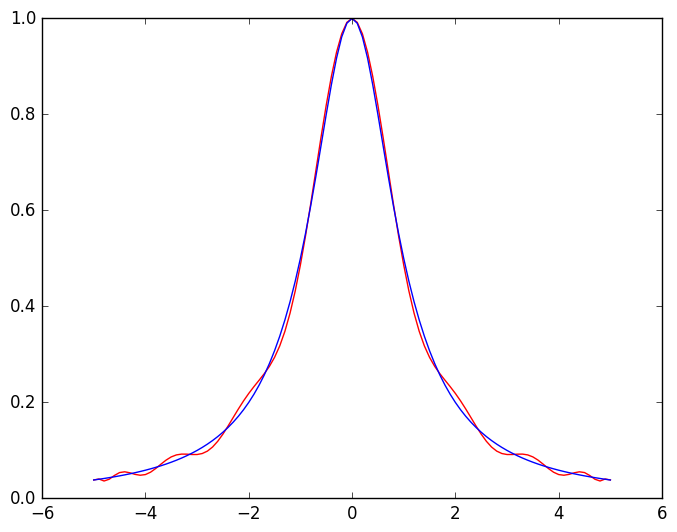

0.02375879629767602

In [19]:
## using PyPlot
x = [(1-ξ)*el.a/2 + (1+ξ)*el.b/2 for el in elemento]
maxerr = -1000000
for e = 1:nel
    uu = fun(x[e])
    err = maxabs(uu-Ue[:,e])
    if err > maxerr maxerr = err end
        
    plot(x[e], Ue[:,e], "r", x[e], uu, "b")
    #xlim(-5.5,-4.5)
end
maxerr